In [1]:
import pandas as pd
import numpy as np
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

base_path = '/Users/freezylex/Documents/course_work/'

# Herfindahl Index

### Basic hhi calculation function

In [2]:
def calc_hhi(base_path, file_path, byusell, bond):
    try:
        file = pd.read_csv(base_path + file_path, 
                        index_col = 'Unnamed: 0')
        file['SECCODE'] = file['SECCODE'].apply(lambda x: x[:-1])
        t_file = file[(file['BUYSELL'] == byusell) & (file['SECCODE'] == bond)]
        t_file['PRICE'] = np.round(t_file['PRICE'], 4)
        try:
            hhi = t_file.groupby('PRICE').sum()['VOLUME'] / t_file.VOLUME.sum()
            if (hhi ** 2).sum() == 0:
                return 1
            return (hhi ** 2).sum()
        except:
            return 1
    except:
        return -100

In [3]:
def make_hhi_metric(rates_df, b_path, type_deal, type_deal_2 = None):
    list_of_bonds = rates_df.columns.values
    date_range = rates_df.index
    metric_df = pd.DataFrame(columns = list_of_bonds,
                            index = date_range)
    for date in tqdm(date_range):
        real_date = date
        date = date.to_pydatetime()
        year = date.year
        month = date.month
        day = date.day
        if month < 10:
            month = ('0' + str(month))
        else:
            month = str(month)
        if day < 10:
            day = ('0' + str(day))
        else:
            day = str(day)
        date = str(year) + month + day
        name = 'OrderLog' + date + '.csv'
        path_to_file = 'data/raw_data/Trading_dates_Order_Log/' + name
        for bond_name in list_of_bonds:
            hhi = calc_hhi(b_path, path_to_file, type_deal, bond_name)
            if type_deal_2:
                hhi_2 = calc_hhi(b_path, path_to_file, type_deal_2, bond_name)
                metric_df.loc[real_date, bond_name] = max(hhi, hhi_2)
            else:
                metric_df.loc[real_date, bond_name] = hhi
    return metric_df

In [4]:
rates = pd.read_excel(base_path + 'data/final_target.xlsx',
                      index_col = 'Date', parse_dates=True)
rates.head(2)

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2015-03-02,71.054960,15.591795,52.374278,64.990138,-169.664339,-215.003930,-6.438351,69.280317,-77.673548,-82.483912,45.211617,46.084832,65.853786,32.091102,-103.946423
2015-03-03,-7.712548,-45.530358,-17.835183,-14.148114,-187.530919,-263.409824,-59.776986,-10.913728,-120.289471,-113.189118,-22.483303,-26.540902,-9.923194,-35.261262,-130.308823


## HHI based in byu-deals

In [5]:
bid_hhi = make_hhi_metric(rates, base_path, 'B')
bid_hhi.tail(2)

  0%|          | 0/235 [00:00<?, ?it/s]<ipython-input-2-c5ba4d93e284>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_file['PRICE'] = np.round(t_file['PRICE'], 4)
100%|██████████| 235/235 [00:48<00:00,  4.85it/s]


,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2016-02-18,0.124909,0.080166,0.291719,0.165064,0.05763,0.24961,0.099918,0.337197,0.087716,0.054693,0.141984,0.126488,0.106055,0.076229,0.085921
2016-02-19,0.093769,0.080413,0.104839,0.157991,0.090267,0.088907,0.094021,0.11701,0.109359,0.081217,0.105004,0.216018,0.31426,0.148718,0.099729


In [6]:
bid_hhi[bid_hhi == -100] = np.nan

In [7]:
bid_hhi.isna().sum().sum()

15

In [8]:
bid_hhi *= 100

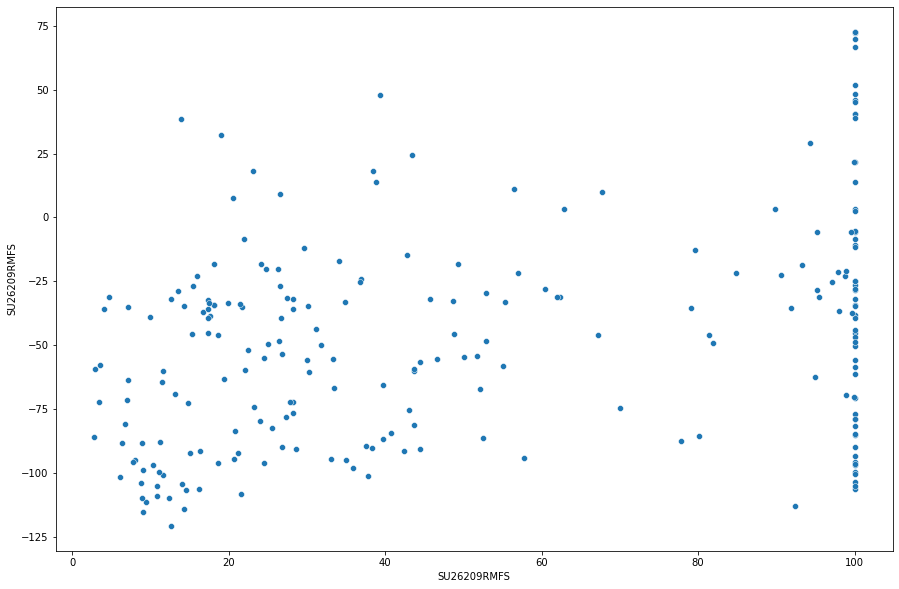

In [36]:
bond = 'SU26209RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = bid_hhi[bond], y = rates[bond])
plt.show()

## HHI based in sell-deals

In [37]:
sell_hhi = make_hhi_metric(rates, base_path, 'S')
sell_hhi.tail(2)

100%|██████████| 235/235 [00:52<00:00,  4.50it/s]


,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2016-02-18,0.17764,0.117053,0.175388,0.364607,0.072484,0.23484,0.098264,0.378616,0.138651,0.101992,0.182034,0.129214,0.166938,0.091143,0.111874
2016-02-19,0.117711,0.09948,0.166054,0.840974,0.097716,0.175117,0.11043,0.102509,0.112248,0.06245,0.132028,0.156279,0.169853,0.124835,0.075136


In [38]:
sell_hhi[sell_hhi == -100] = np.nan
sell_hhi *= 100
sell_hhi.isna().sum().sum()

15

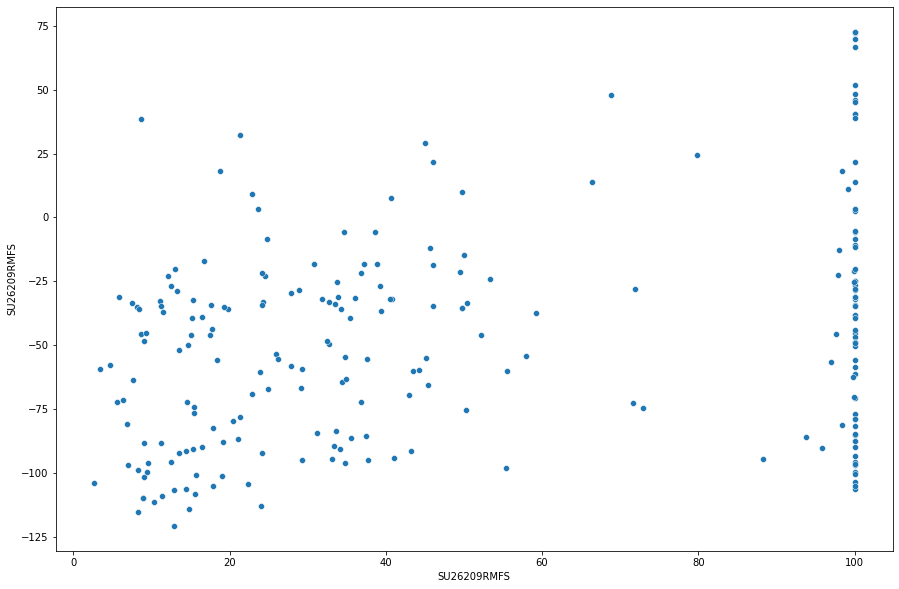

In [40]:
bond = 'SU26209RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = sell_hhi[bond], y = rates[bond])
plt.show()

In [42]:
sell_hhi.to_csv(os.path.join(base_path, 'data/metrics/ask_hhi.csv'))
bid_hhi.to_csv(os.path.join(base_path, 'data/metrics/bid_hhi.csv'))

## Max

In [5]:
max_hhi = make_hhi_metric(rates, base_path, 'B', 'S')
max_hhi.tail(2)

  0%|          | 0/235 [00:00<?, ?it/s]<ipython-input-2-c5ba4d93e284>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_file['PRICE'] = np.round(t_file['PRICE'], 4)
100%|██████████| 235/235 [01:40<00:00,  2.35it/s]


,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2016-02-18,0.17764,0.117053,0.291719,0.364607,0.072484,0.24961,0.099918,0.378616,0.138651,0.101992,0.182034,0.129214,0.166938,0.091143,0.111874
2016-02-19,0.117711,0.09948,0.166054,0.840974,0.097716,0.175117,0.11043,0.11701,0.112248,0.081217,0.132028,0.216018,0.31426,0.148718,0.099729


In [6]:
max_hhi[max_hhi == -100] = np.nan
max_hhi *= 100
max_hhi.isna().sum().sum()

15

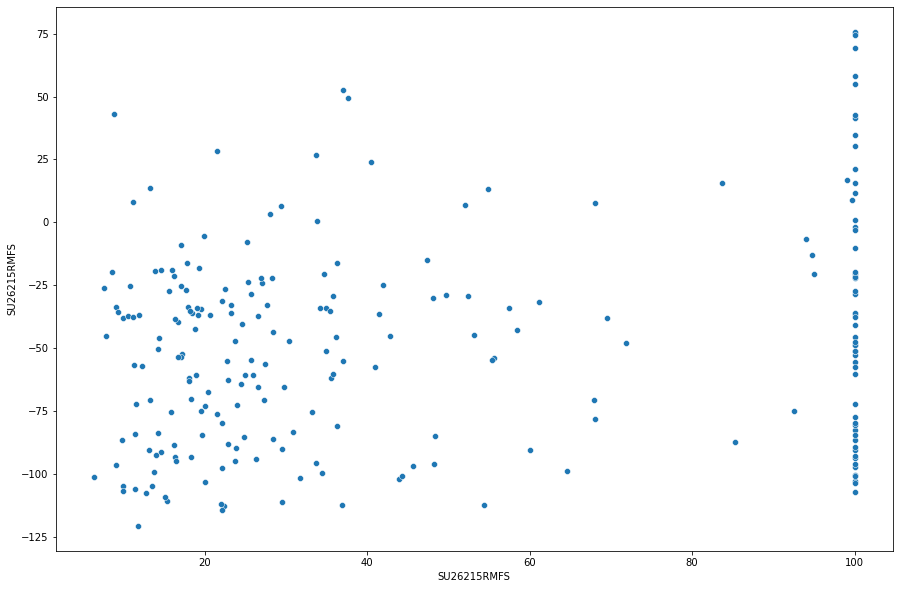

In [7]:
bond = 'SU26215RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = max_hhi[bond], y = rates[bond])
plt.show()

In [8]:
max_hhi.to_csv(os.path.join(base_path, 'data/metrics/max_hhi.csv'))